<a href="https://colab.research.google.com/github/rafael2ll/autoencoders/blob/master/autoencoders_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define input sequence
sequence = array([x/10 for x in range(10000)])
sequence2 = array([x*10 for x in range(10000)])
sequence3 = array([-x for x in range(10000)])
sequence_X = array([[x,y,z] for (x,y,z) in zip(sequence,sequence2, sequence3)])

In [0]:
sequence_X = sequence_X.reshape(sequence_X.shape[0],sequence_X.shape[1], 1)
print(sequence_X[:5])
sequence_X.shape

In [0]:

# reshape input into [samples, timesteps, features]
n_in = len(sequence_X[0])
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_X.shape[1], sequence_X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(sequence_X, epochs=300, verbose=0,shuffle=False)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence_X, verbose=0)


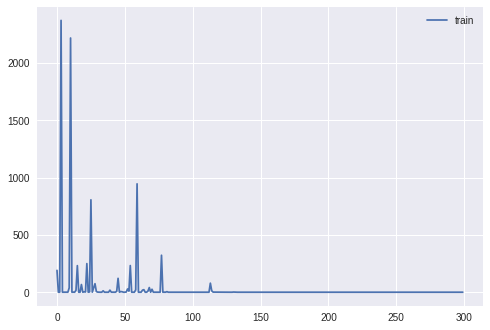

In [115]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [117]:
predictions = model.predict(sequence_X.reshape(10000,3,1))
print(predictions.std())
print(predictions[:5])


0.00058656157
[[0.98353106]
 [0.9879147 ]
 [0.9895491 ]
 [0.9893287 ]
 [0.9893563 ]]


In [142]:
model.predict(array([[100, 100, 100]]).reshape(1, 3, 1))

array([[-3.5380135]], dtype=float32)

## Conclusão:
Com a validação do modelo, podemos perceber que indices correlacionados da sequencia se mantem com correlação em torno de 1.<br>
Valores maiores que 1 indicam relação de superioridade do componente 2 em relação ao componente 1. <br>
Valores menores que 1 indicam disparidade do componente 1 maior do que a do componente 2.